In [1]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv(os.path.join(os.getcwd(), 'data', 'diabetic_data.csv'))

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 101766 entries, 0 to 101765
Data columns (total 50 columns):
 #   Column                    Non-Null Count   Dtype 
---  ------                    --------------   ----- 
 0   encounter_id              101766 non-null  int64 
 1   patient_nbr               101766 non-null  int64 
 2   race                      101766 non-null  object
 3   gender                    101766 non-null  object
 4   age                       101766 non-null  object
 5   weight                    101766 non-null  object
 6   admission_type_id         101766 non-null  int64 
 7   discharge_disposition_id  101766 non-null  int64 
 8   admission_source_id       101766 non-null  int64 
 9   time_in_hospital          101766 non-null  int64 
 10  payer_code                101766 non-null  object
 11  medical_specialty         101766 non-null  object
 12  num_lab_procedures        101766 non-null  int64 
 13  num_procedures            101766 non-null  int64 
 14  num_

In [4]:
def display_all(data):
    with pd.option_context("display.max_row", 100, "display.max_columns", 100):
        display(data)

ids_mapping = os.path.join(os.getcwd(), 'data', 'IDs_mapping.csv')

with open(ids_mapping, 'r') as file:
    lines = file.readlines()

# Identify the indices where the lines contain only a comma
split_indices = [i for i, line in enumerate(lines) if line.strip() == ',']

# Split the list of lines into three parts based on these indices
admission_type_lines = lines[:split_indices[0]]
discharge_disposition_lines = lines[split_indices[0] + 1:split_indices[1]]
admission_source_lines = lines[split_indices[1] + 1:]

# Write each part to a separate CSV file
with open('admission_type_mapping.csv', 'w') as file:
    file.writelines(admission_type_lines)

with open('discharge_disposition_mapping.csv', 'w') as file:
    file.writelines(discharge_disposition_lines)

with open('admission_source_mapping.csv', 'w') as file:
    file.writelines(admission_source_lines)

# Read the three CSV files into DataFrames
admission_type_df = pd.read_csv('admission_type_mapping.csv')
discharge_disposition_df = pd.read_csv('discharge_disposition_mapping.csv')
admission_source_df = pd.read_csv('admission_source_mapping.csv')

# delete the csv files
os.remove('admission_type_mapping.csv')
os.remove('discharge_disposition_mapping.csv')
os.remove('admission_source_mapping.csv')

# Display the DataFrames
display_all(admission_type_df)
display_all(discharge_disposition_df)
display_all(admission_source_df)

,admission_type_id,description
0,1,Emergency
1,2,Urgent
2,3,Elective
3,4,Newborn
4,5,Not Available
5,6,NaN
6,7,Trauma Center
7,8,Not Mapped


,discharge_disposition_id,description
0,1,Discharged to home
1,2,Discharged/transferred to another short term h...
2,3,Discharged/transferred to SNF
3,4,Discharged/transferred to ICF
4,5,Discharged/transferred to another type of inpa...
5,6,Discharged/transferred to home with home healt...
6,7,Left AMA
7,8,Discharged/transferred to home under care of H...
8,9,Admitted as an inpatient to this hospital
9,10,Neonate discharged to another hospital for neo...


,admission_source_id,description
0,1,Physician Referral
1,2,Clinic Referral
2,3,HMO Referral
3,4,Transfer from a hospital
4,5,Transfer from a Skilled Nursing Facility (SNF)
5,6,Transfer from another health care facility
6,7,Emergency Room
7,8,Court/Law Enforcement
8,9,Not Available
9,10,Transfer from critial access hospital


## Data Cleaning ##

In [5]:
# Replace all ?s with NaN
df = df.replace('?', np.nan)

In [6]:
# Pre-process Re-admitted column. If the value is NO, replace it with 0 otherwise replace it with 1. Treat this as a categorical variable.
df['readmitted'] = df['readmitted'].apply(lambda x: 0 if x == 'NO' else 1)

In [7]:
# drop rows with gender "Unknown/Invalid"
df = df.drop(df.loc[df['gender'] == 'Unknown/Invalid'].index, axis=0)

In [8]:
# pre-process Age column [x-y) -> (x+y)/2
def compute_mean_age(age_str):
    x, y = age_str[1:-1].split('-')
    x = int(x)
    y = int(y)
    mean_age = (x + y) / 2
    return mean_age

df['age'] = df['age'].apply(compute_mean_age)

In [9]:
# drop the weight column as it is many missing values
df = df.drop('weight', axis=1)

In [10]:
# remove all rows when the patient expired or went into hospice
df = df.drop(df.loc[df['discharge_disposition_id'].isin([11, 13, 14, 19, 20, 21])].index, axis=0)

In [11]:
# remove all rows with duplicate patient_nbr, keeping the first occurrence
df = df.drop_duplicates(subset='patient_nbr', keep='first')

In [12]:
# drop payer_code and encounter_id columns
df = df.drop(['payer_code', 'encounter_id'], axis=1)

In [13]:
import re

def transform_value(value):
    value = re.sub("V[0-9]*", "0", value) # V 
    value = re.sub("E[0-9]*", "0", value) # E 
    value = re.sub('NaN', "-1", value) # Nan 
    return value

def transform_category(value):
    if value>=390 and value<=459 or value==785:
        category = 'Circulatory'
    elif value>=460 and value<=519 or value==786:
        category = 'Respiratory'
    elif value>=520 and value<=579 or value==787:
        category = 'Digestive'
    elif value==250:
        category = 'Diabetes'
    elif value>=800 and value<=999:
        category = 'Injury'          
    elif value>=710 and value<=739:
        category = 'Musculoskeletal'   
    elif value>=580 and value<=629 or value==788:
        category = 'Genitourinary'
    elif value>=140 and value<=239 :
        category = 'Neoplasms'
    elif value==-1:
        category = 'NAN'
    else :
        category = 'Other'

    return category

diag_list = ['diag_1','diag_2','diag_3']

for col in diag_list:
    df[col].fillna('NaN', inplace=True)

for col in diag_list:
    df[col] = df[col].apply(transform_value)
    df[col] = df[col].astype(float)

for col in diag_list:
    df[col] = df[col].apply(transform_category)

C:\Users\ic019797\AppData\Local\Temp\ipykernel_37828\1043167833.py:36: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df[col].fillna('NaN', inplace=True)


# Visualizations

### Readmissions to Number of patients ###

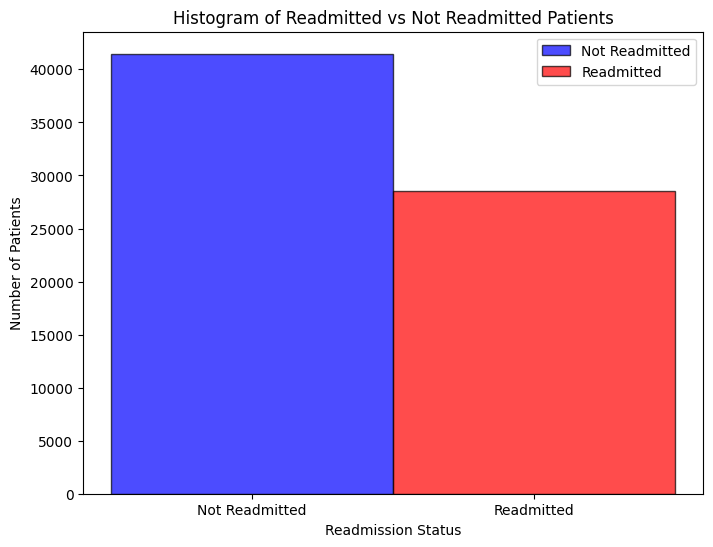

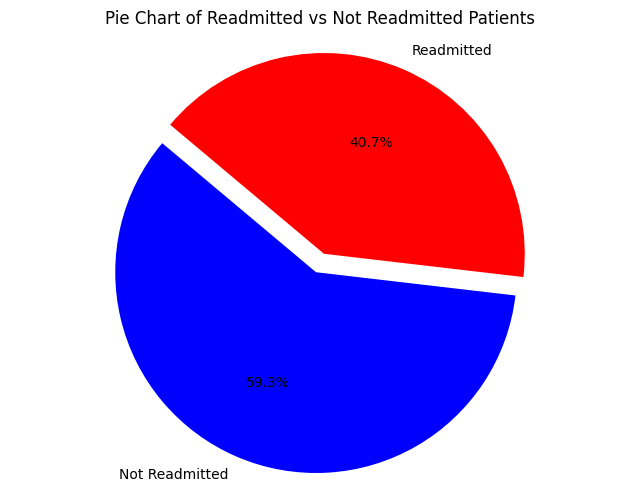

In [14]:
not_readmitted = df[df['readmitted'] == 0]
readmitted = df[df['readmitted'] == 1]

plt.figure(figsize=(8, 6))
plt.hist(not_readmitted['readmitted'], bins=1, edgecolor='black', alpha=0.7, color='blue', label='Not Readmitted')
plt.hist(readmitted['readmitted'], bins=1, edgecolor='black', alpha=0.7, color='red', label='Readmitted')
plt.xticks([0, 1], ['Not Readmitted', 'Readmitted'])
plt.xlabel('Readmission Status')
plt.ylabel('Number of Patients')
plt.title('Histogram of Readmitted vs Not Readmitted Patients')
plt.legend()
plt.show()

not_readmitted_count = df[df['readmitted'] == 0].shape[0]
readmitted_count = df[df['readmitted'] == 1].shape[0]
labels = ['Not Readmitted', 'Readmitted']
sizes = [not_readmitted_count, readmitted_count]
colors = ['blue', 'red']
explode = (0.1, 0)  # explode the 1st slice (Not Readmitted)
plt.figure(figsize=(8, 6))
plt.pie(sizes, explode=explode, labels=labels, colors=colors, autopct='%1.1f%%', shadow=False, startangle=140)
plt.title('Pie Chart of Readmitted vs Not Readmitted Patients')
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.show()

## Readmissions based on Age ##

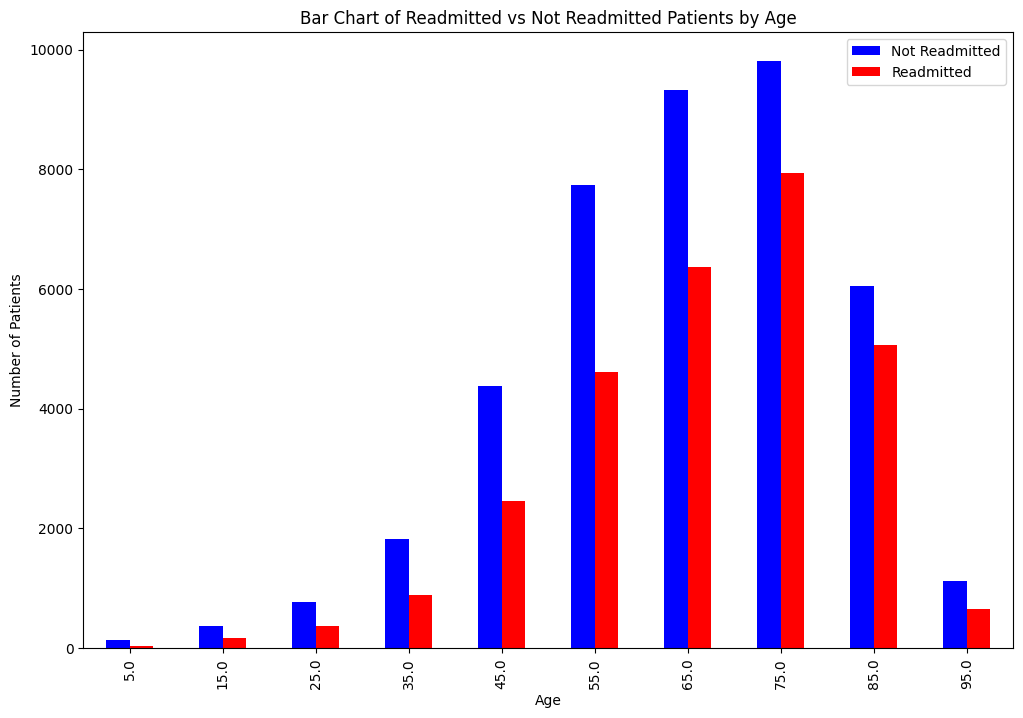

In [15]:
age_readmitted_counts = df.groupby(['age', 'readmitted']).size().unstack(fill_value=0)

age_readmitted_counts.plot(kind='bar', stacked=False, figsize=(12, 8), color=['blue', 'red'])
plt.xlabel('Age')
plt.ylabel('Number of Patients')
plt.title('Bar Chart of Readmitted vs Not Readmitted Patients by Age')
plt.legend(['Not Readmitted', 'Readmitted'])
plt.show()

## Re-admissions based on Discharge Disposition ID ##

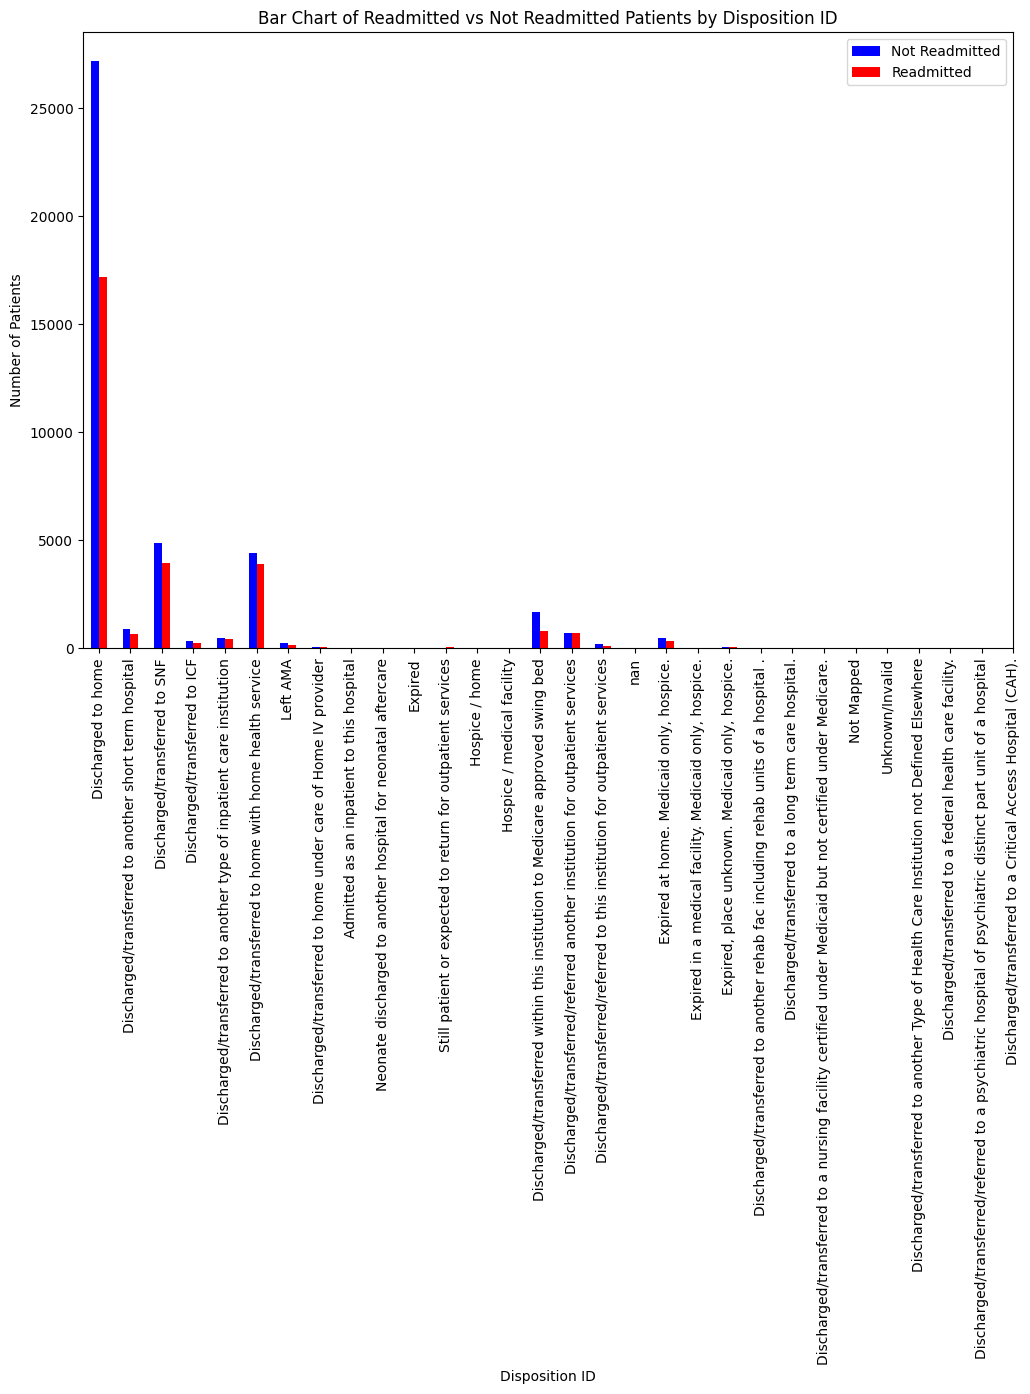

In [16]:
# Plot count of patients with readmissions vs disposition id
disposition_readmitted_counts = df.groupby(['discharge_disposition_id', 'readmitted']).size().unstack(fill_value=0)
# remove all the disposition ids that have zero counts for both readmitted and not readmitted patients
disposition_readmitted_counts = disposition_readmitted_counts.loc[(disposition_readmitted_counts != 0).any(axis=1)]

disposition_readmitted_counts.plot(kind='bar', stacked=False, figsize=(12, 8), color=['blue', 'red'])
# before plotting, we need to replace the disposition id with the actual description
disposition_id_mapping = discharge_disposition_df.set_index('discharge_disposition_id').to_dict()['description']
plt.xticks(range(len(disposition_id_mapping)), disposition_id_mapping.values(), rotation=90)
plt.xlabel('Disposition ID')
plt.ylabel('Number of Patients')
plt.title('Bar Chart of Readmitted vs Not Readmitted Patients by Disposition ID')
plt.legend(['Not Readmitted', 'Readmitted'])
plt.show()

## Re-admissions based on Race ##

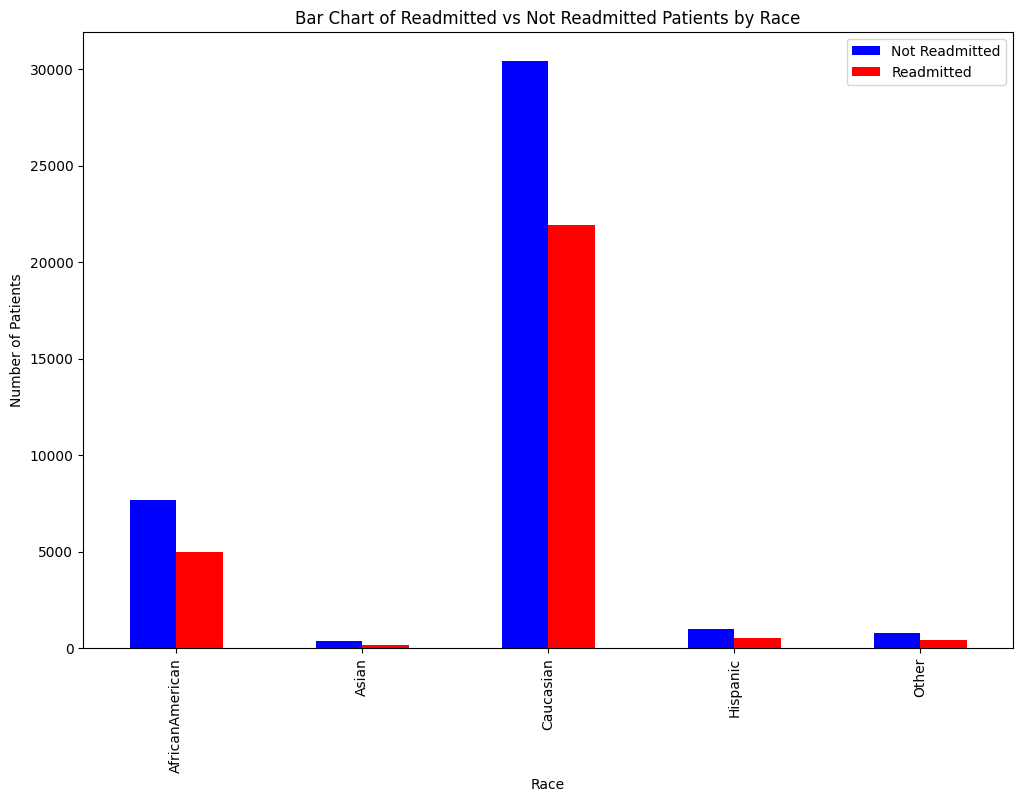

In [17]:
# plot readmission counts vs race
race_readmitted_counts = df.groupby(['race', 'readmitted']).size().unstack(fill_value=0)

race_readmitted_counts.plot(kind='bar', stacked=False, figsize=(12, 8), color=['blue', 'red'])
plt.xlabel('Race')
plt.ylabel('Number of Patients')
plt.title('Bar Chart of Readmitted vs Not Readmitted Patients by Race')
plt.legend(['Not Readmitted', 'Readmitted'])
plt.show()

## Re-admissions based on Gender ##

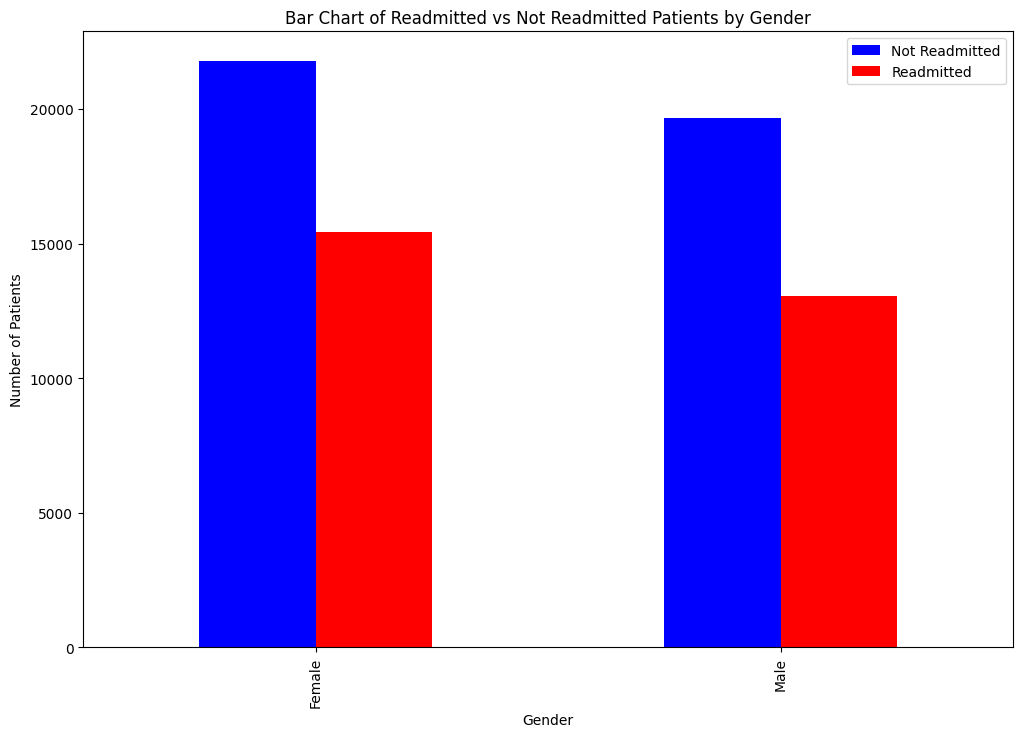

In [18]:
# plot readmission counts vs gender
gender_readmitted_counts = df.groupby(['gender', 'readmitted']).size().unstack(fill_value=0)

gender_readmitted_counts.plot(kind='bar', stacked=False, figsize=(12, 8), color=['blue', 'red'])
plt.xlabel('Gender')
plt.ylabel('Number of Patients')
plt.title('Bar Chart of Readmitted vs Not Readmitted Patients by Gender')
plt.legend(['Not Readmitted', 'Readmitted'])
plt.show()

## Re-admissions based on Number of Procedures ##

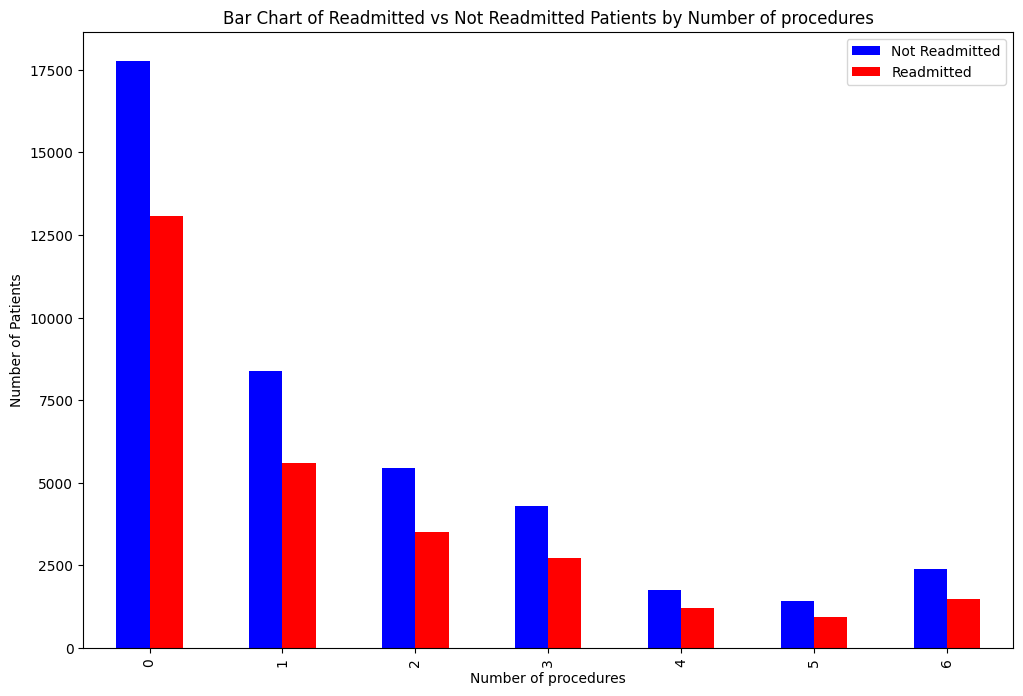

In [19]:
# plot readmission counts vs number of procedures
num_procedures_readmitted_counts = df.groupby(['num_procedures', 'readmitted']).size().unstack(fill_value=0)
num_procedures_readmitted_counts.plot(kind='bar', stacked=False, figsize=(12, 8), color=['blue', 'red'])
plt.xlabel('Number of procedures')
plt.ylabel('Number of Patients')
plt.title('Bar Chart of Readmitted vs Not Readmitted Patients by Number of procedures')
plt.legend(['Not Readmitted', 'Readmitted'])
plt.show()

## Re-admissions based on number of medications ##

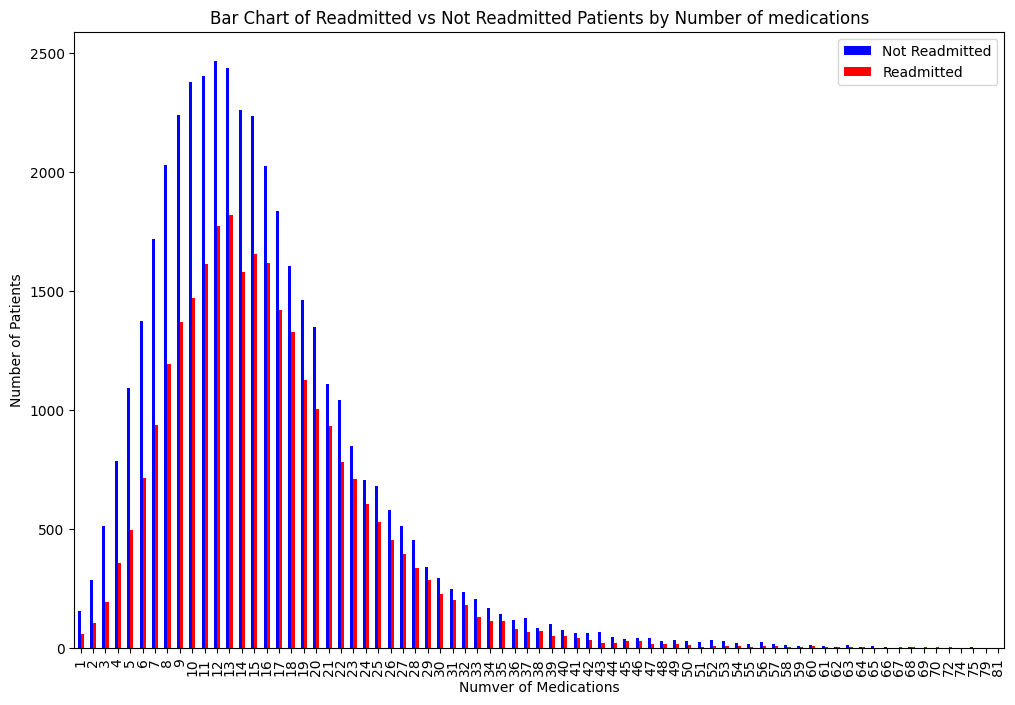

In [20]:
# plot readmission counts vs number of medications
num_medications_readmitted_counts = df.groupby(['num_medications', 'readmitted']).size().unstack(fill_value=0)
num_medications_readmitted_counts.plot(kind='bar', stacked=False, figsize=(12, 8), color=['blue', 'red'])
plt.xlabel('Numver of Medications')
plt.ylabel('Number of Patients')
plt.title('Bar Chart of Readmitted vs Not Readmitted Patients by Number of medications')
plt.legend(['Not Readmitted', 'Readmitted'])
plt.show()

## Re-admissions based on Number of Outpatients ##

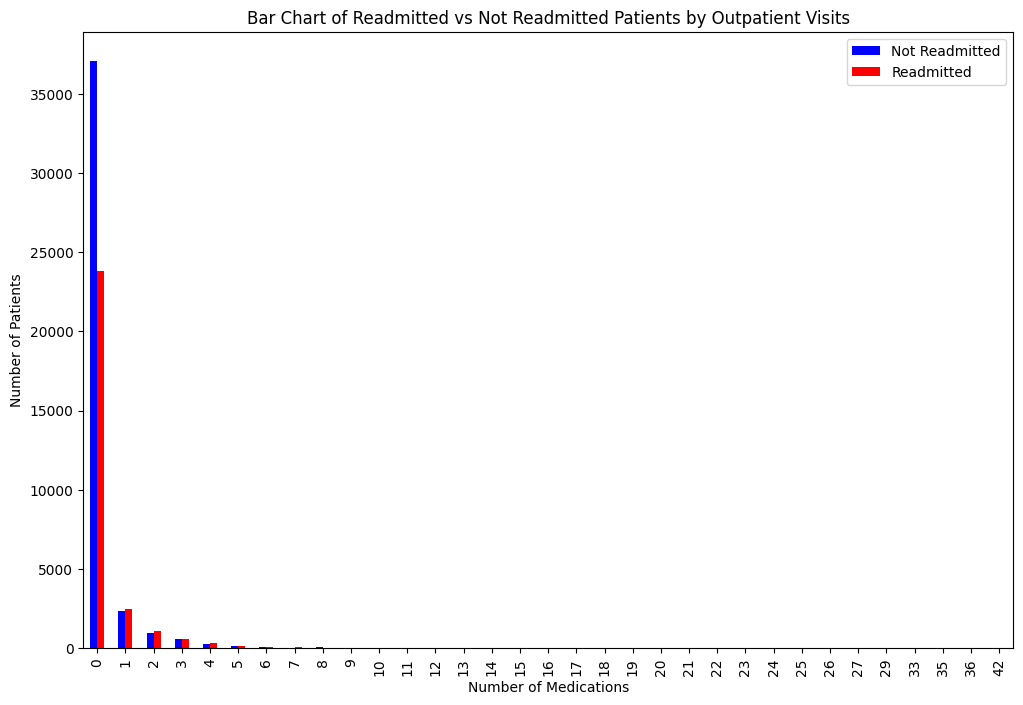

In [21]:
# plot readmission counts vs number of outpatient visits
num_outpatient_readmitted_counts = df.groupby(['number_outpatient', 'readmitted']).size().unstack(fill_value=0)
num_outpatient_readmitted_counts.plot(kind='bar', stacked=False, figsize=(12, 8), color=['blue', 'red'])
plt.xlabel('Number of Medications')
plt.ylabel('Number of Patients')
plt.title('Bar Chart of Readmitted vs Not Readmitted Patients by Outpatient Visits')
plt.legend(['Not Readmitted', 'Readmitted'])
plt.show()

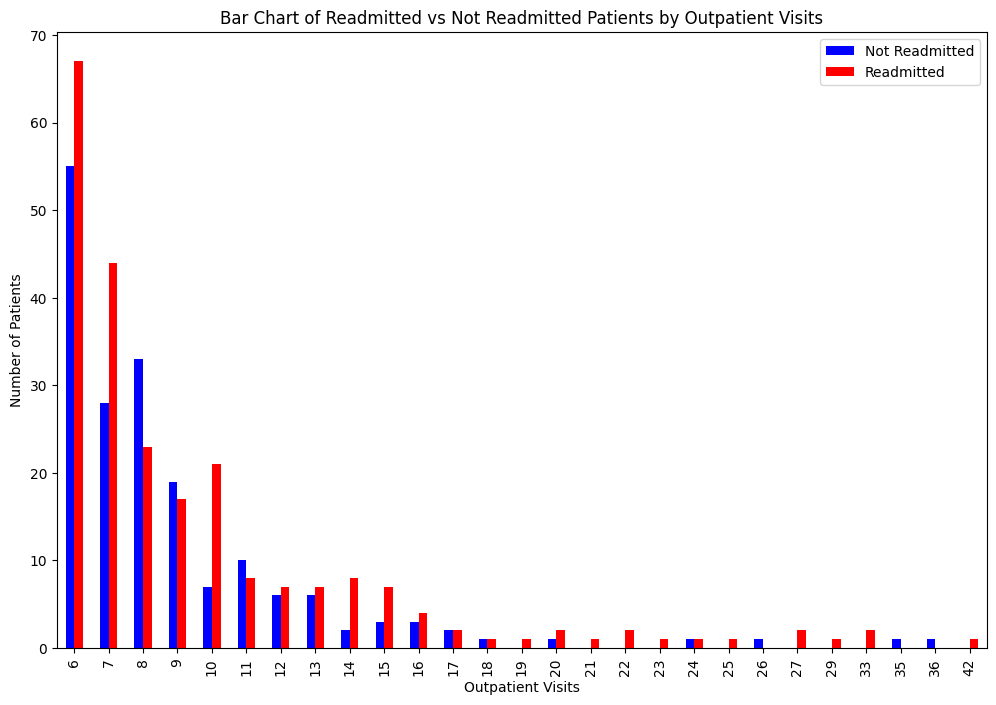

In [22]:
num_outpatient_readmitted_counts_5 = df[df['number_outpatient'] > 5].groupby(['number_outpatient', 'readmitted']).size().unstack(fill_value=0)
num_outpatient_readmitted_counts_5.plot(kind='bar', stacked=False, figsize=(12, 8), color=['blue', 'red'])
plt.xlabel('Outpatient Visits')
plt.ylabel('Number of Patients')
plt.title('Bar Chart of Readmitted vs Not Readmitted Patients by Outpatient Visits')
plt.legend(['Not Readmitted', 'Readmitted'])
plt.show()

## Re-admissions based on Number of Inpatients ##

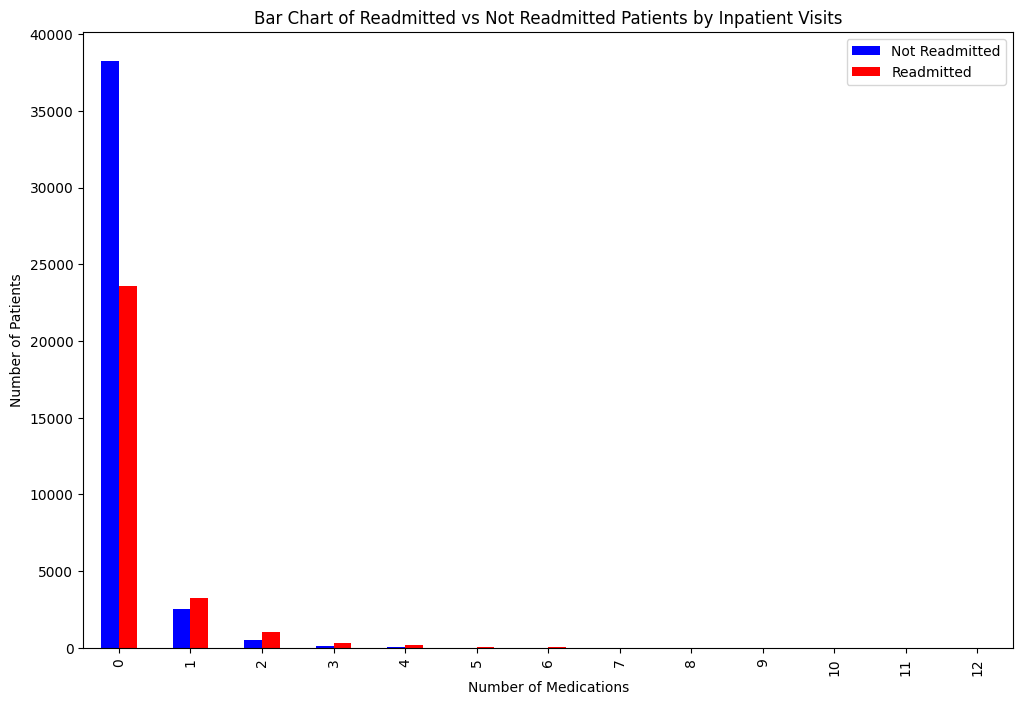

In [23]:
# plot readmission counts vs number of inpatient visits
num_inpatient_readmitted_counts = df.groupby(['number_inpatient', 'readmitted']).size().unstack(fill_value=0)
num_inpatient_readmitted_counts.plot(kind='bar', stacked=False, figsize=(12, 8), color=['blue', 'red'])
plt.xlabel('Number of Medications')
plt.ylabel('Number of Patients')
plt.title('Bar Chart of Readmitted vs Not Readmitted Patients by Inpatient Visits')
plt.legend(['Not Readmitted', 'Readmitted'])
plt.show()

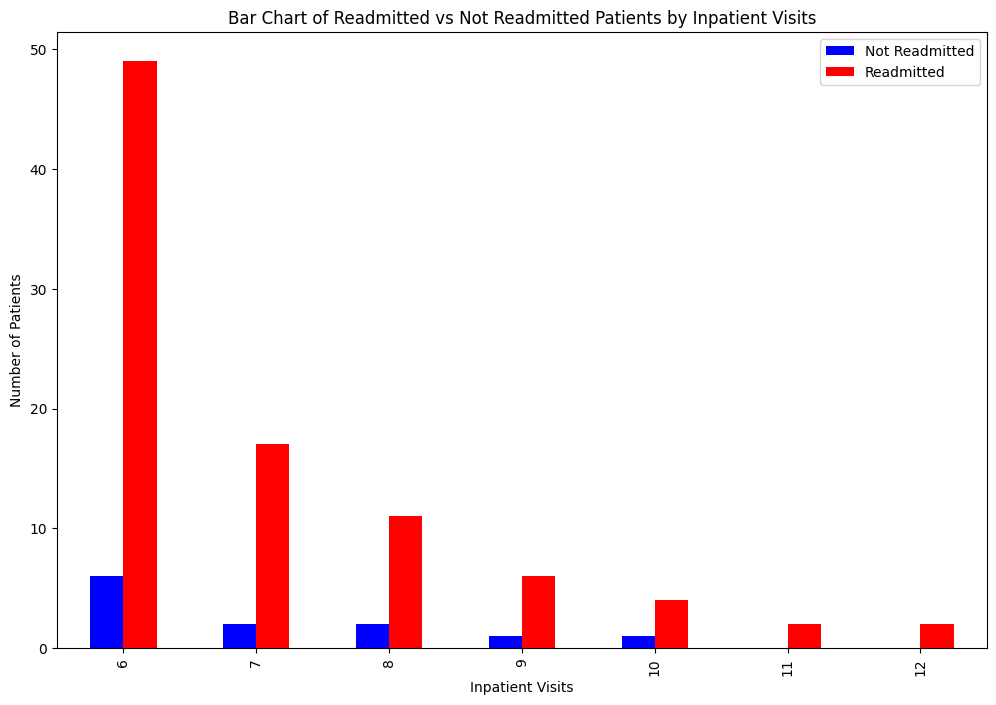

In [24]:
num_inpatient_readmitted_counts_5 = df[df['number_inpatient'] > 5].groupby(['number_inpatient', 'readmitted']).size().unstack(fill_value=0)
num_inpatient_readmitted_counts_5.plot(kind='bar', stacked=False, figsize=(12, 8), color=['blue', 'red'])
plt.xlabel('Inpatient Visits')
plt.ylabel('Number of Patients')
plt.title('Bar Chart of Readmitted vs Not Readmitted Patients by Inpatient Visits')
plt.legend(['Not Readmitted', 'Readmitted'])
plt.show()

# Re-admissions based on Number of lab procedures

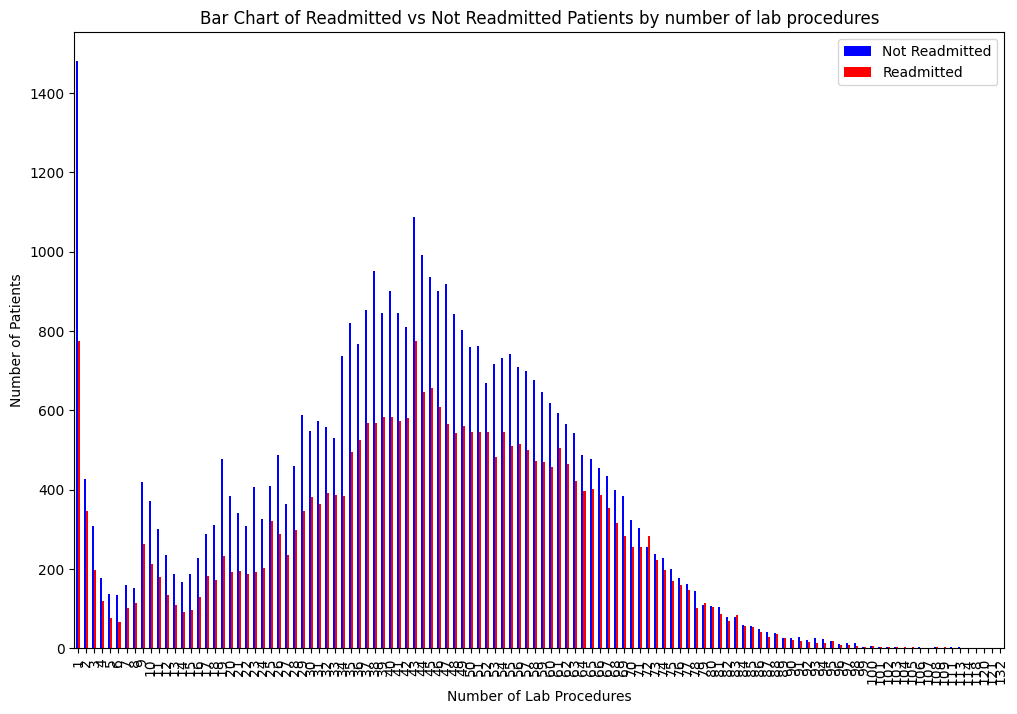

In [25]:
# plot readmission counts vs number of lab procedures
num_lab_procedures_readmitted_counts = df.groupby(['num_lab_procedures', 'readmitted']).size().unstack(fill_value=0)
num_lab_procedures_readmitted_counts.plot(kind='bar', stacked=False, figsize=(12, 8), color=['blue', 'red'])
plt.xlabel('Number of Lab Procedures')
plt.ylabel('Number of Patients')
plt.title('Bar Chart of Readmitted vs Not Readmitted Patients by number of lab procedures')
plt.legend(['Not Readmitted', 'Readmitted'])
plt.show()

## Re-admissions based on diagnosis ##

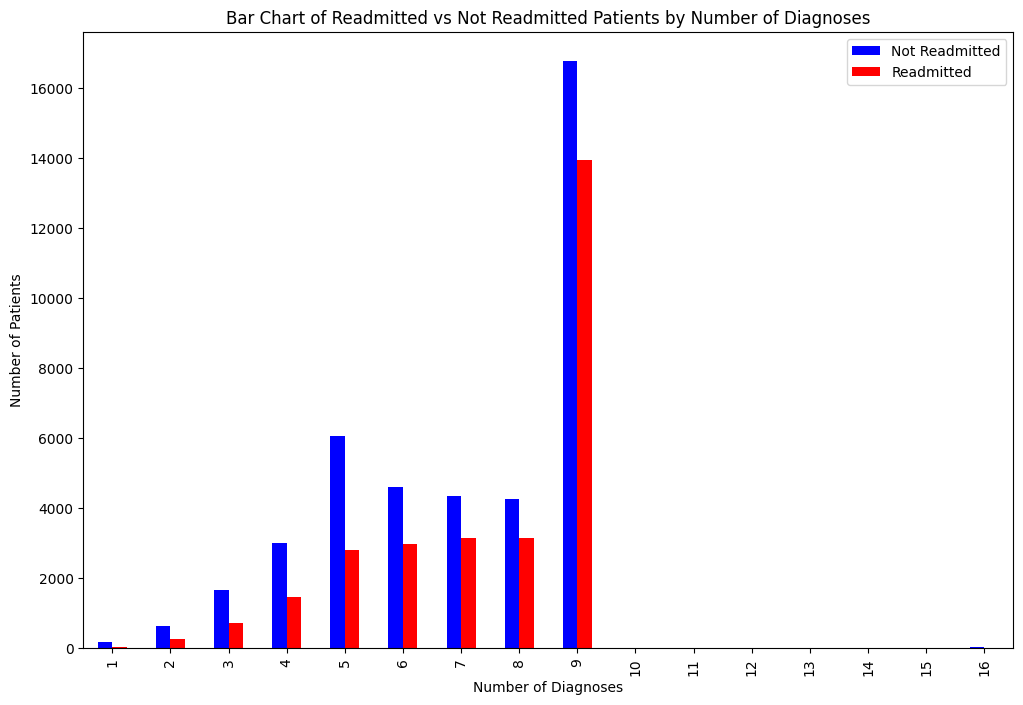

In [26]:
# plot readmission counts vs number of diagnoses
num_diagnosis_readmitted_counts = df.groupby(['number_diagnoses', 'readmitted']).size().unstack(fill_value=0)
num_diagnosis_readmitted_counts.plot(kind='bar', stacked=False, figsize=(12, 8), color=['blue', 'red'])
plt.xlabel('Number of Diagnoses')
plt.ylabel('Number of Patients')
plt.title('Bar Chart of Readmitted vs Not Readmitted Patients by Number of Diagnoses')
plt.legend(['Not Readmitted', 'Readmitted'])
plt.show()

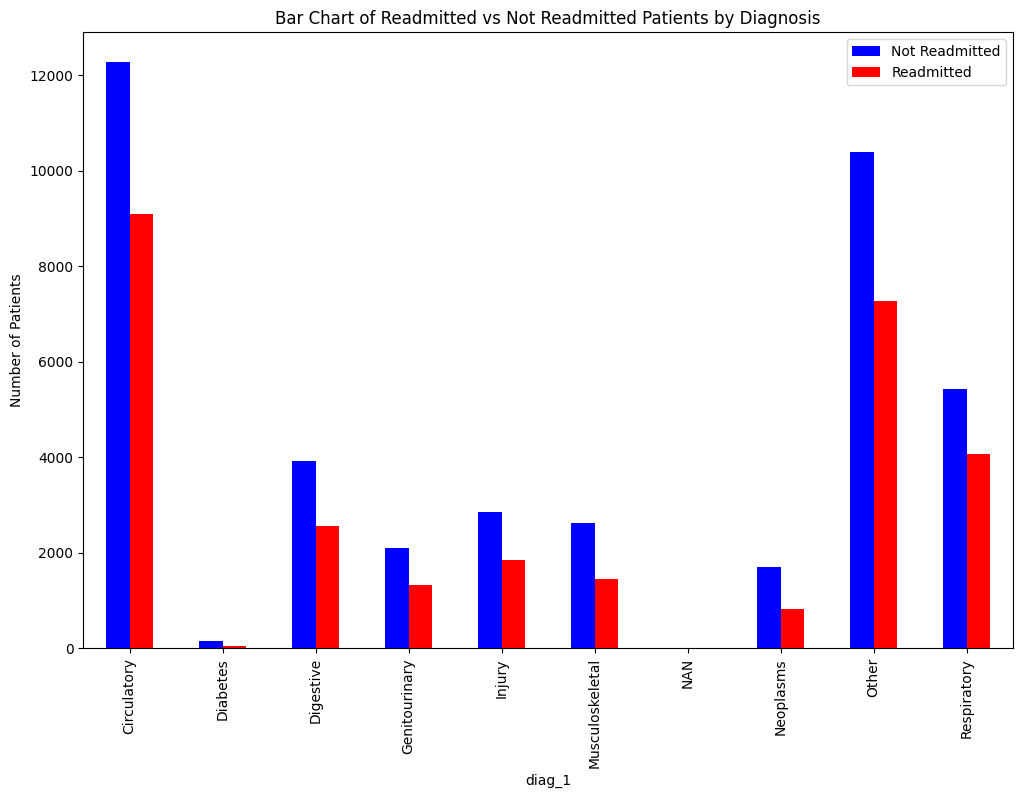

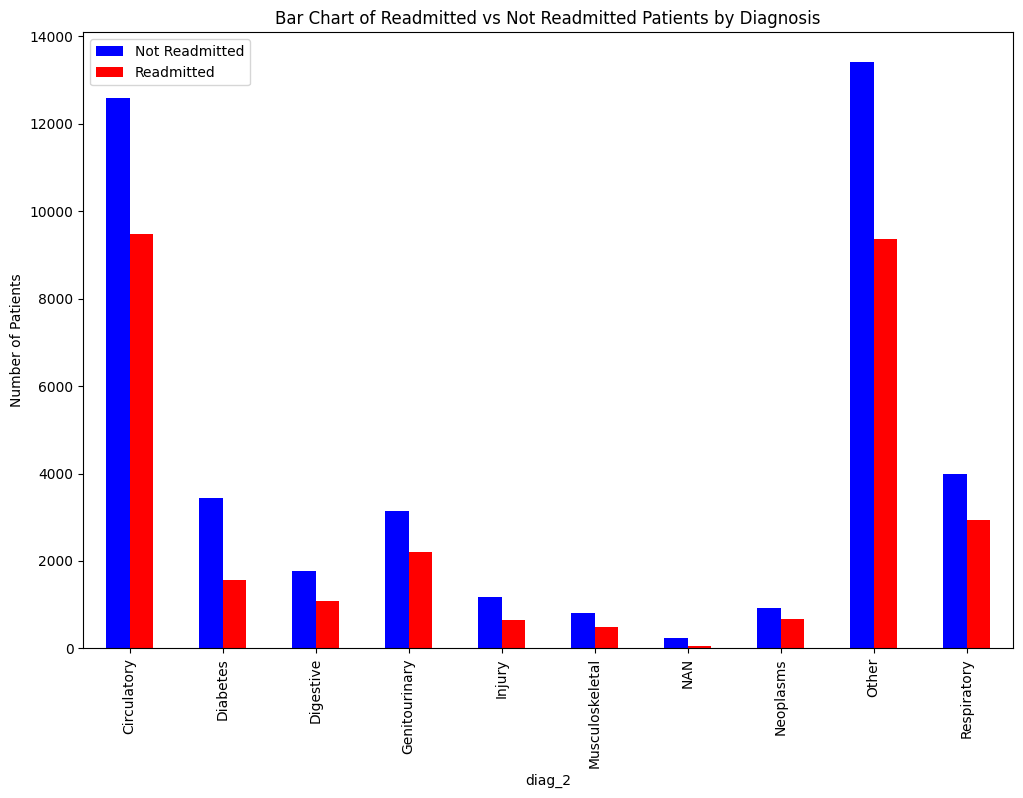

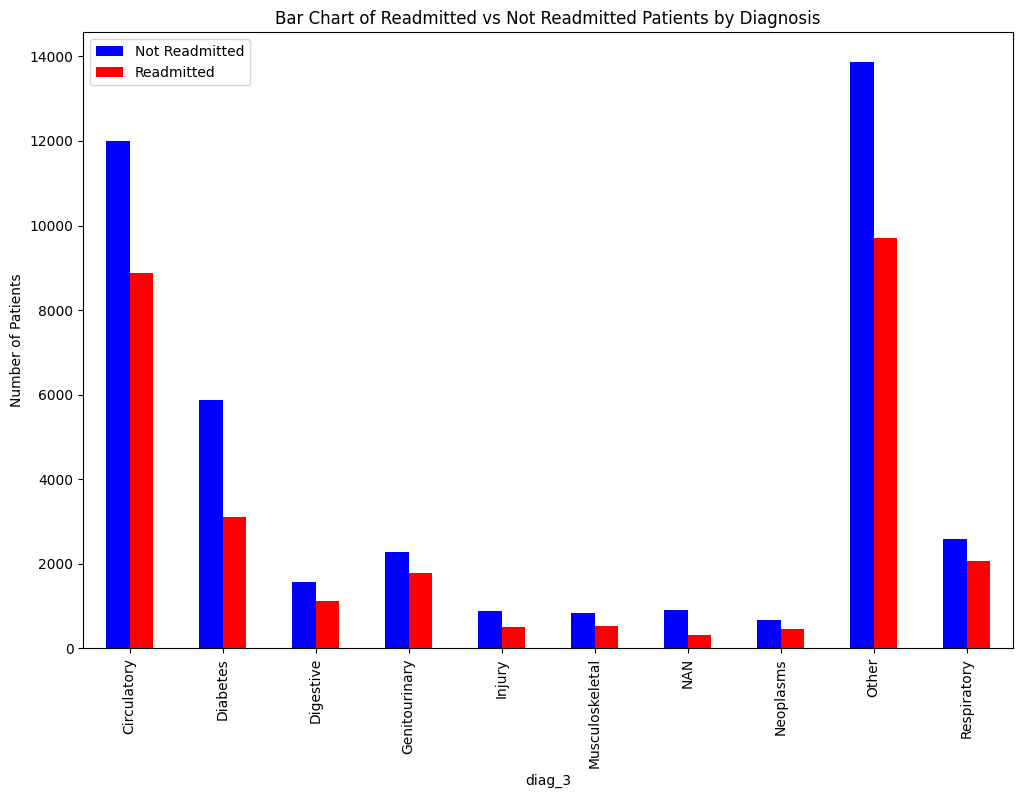

In [27]:
# plot readmission counts vs diagnisis 1
for diag_col in diag_list:
    diag_readmitted_counts = df.groupby([diag_col, 'readmitted']).size().unstack(fill_value=0)
    diag_readmitted_counts.plot(kind='bar', stacked=False, figsize=(12, 8), color=['blue', 'red'])
    plt.xlabel(diag_col)
    plt.ylabel('Number of Patients')
    plt.title('Bar Chart of Readmitted vs Not Readmitted Patients by Diagnosis')
    plt.legend(['Not Readmitted', 'Readmitted'])
    plt.show()

## Re-admissions based on Max Glu Serum ##

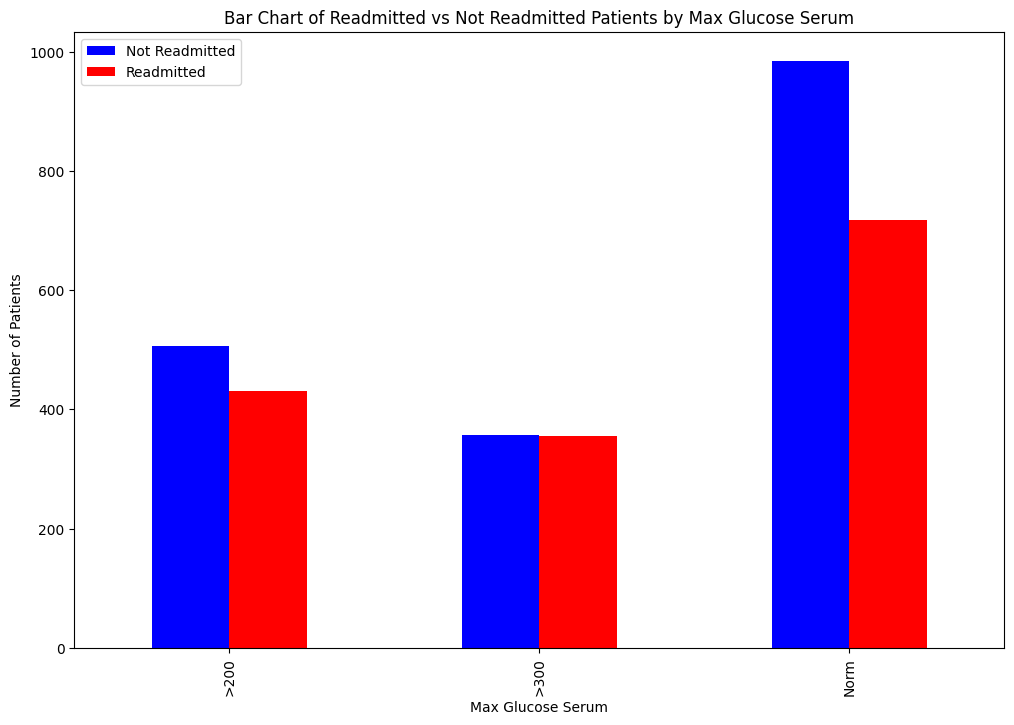

In [28]:
# plot readmissions vs max glucose serum test results
max_glu_serum_readmitted_counts = df[pd.notna(df['max_glu_serum'])].groupby(['max_glu_serum', 'readmitted']).size().unstack(fill_value=0)
max_glu_serum_readmitted_counts.plot(kind='bar', stacked=False, figsize=(12, 8), color=['blue', 'red'])
plt.xlabel('Max Glucose Serum')
plt.ylabel('Number of Patients')
plt.title('Bar Chart of Readmitted vs Not Readmitted Patients by Max Glucose Serum')
plt.legend(['Not Readmitted', 'Readmitted'])
plt.show()

## Re-admissions based on HbA1C result ##

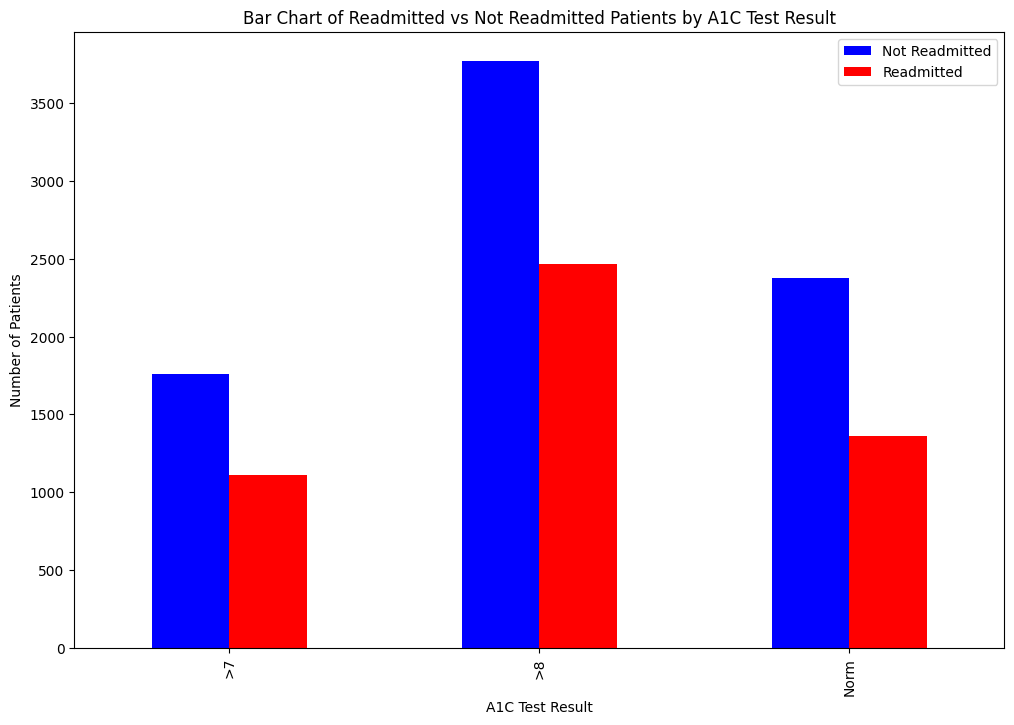

In [29]:
# plot readmissions vs A1C test results
a1c_readmitted_counts = df[pd.notna(df['A1Cresult'])].groupby(['A1Cresult', 'readmitted']).size().unstack(fill_value=0)
a1c_readmitted_counts.plot(kind='bar', stacked=False, figsize=(12, 8), color=['blue', 'red'])
plt.xlabel('A1C Test Result')
plt.ylabel('Number of Patients')
plt.title('Bar Chart of Readmitted vs Not Readmitted Patients by A1C Test Result')
plt.legend(['Not Readmitted', 'Readmitted'])
plt.show()

## Re-admissions based on Change ##

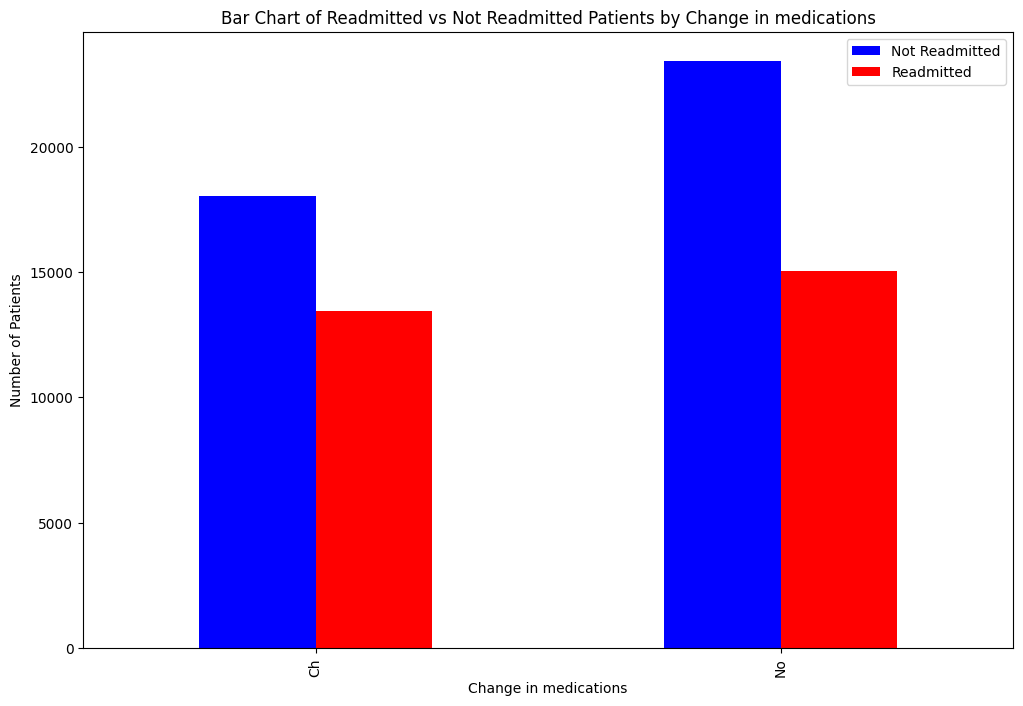

In [30]:
# plot re-admissions vs change in medications
change_readmitted_counts = df.groupby(['change', 'readmitted']).size().unstack(fill_value=0)
change_readmitted_counts.plot(kind='bar', stacked=False, figsize=(12, 8), color=['blue', 'red'])
plt.xlabel('Change in medications')
plt.ylabel('Number of Patients')
plt.title('Bar Chart of Readmitted vs Not Readmitted Patients by Change in medications')
plt.legend(['Not Readmitted', 'Readmitted'])
plt.show()